# Week 1: Project Introduction & Data Collection

## Project Title
**Predicting Employee Attrition using Machine Learning**

## Problem Statement
This project aims to predict whether an employee is likely to leave the company based on various HR-related features like salary, job satisfaction, years at the company, and overtime. Early prediction of attrition can help organizations reduce turnover costs and improve retention strategies.

## Importance of the Project
Employee attrition leads to loss of productivity, increased hiring costs, and disruption in team performance. Using data science to anticipate which employees are at risk of leaving helps HR teams take proactive actions to retain talent.

## Dataset Source
[IBM HR Analytics Employee Attrition Dataset (Kaggle)](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

## Target Variable
`Attrition` — whether an employee left the company (`Yes`) or stayed (`No`)

## Tools & Technologies
- Python
- Jupyter Notebook
- pandas, matplotlib, seaborn
- scikit-learn
- GitHub

In [1]:
#LOADING THE DATASET
# Import required libraries
import pandas as pd

# Load dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display first few rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# WEEK 2: EDA + DATA CLEANING

In [2]:
#EXPLORING THE DATASET
# Checking the number of rows and columns
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn names:\n", df.columns.tolist())

# Data types and non-null values
df.info()

# Summary statistics for numerical columns
df.describe()

# Check for missing values
print(df.isnull().sum())

Shape of dataset: (1470, 35)

Column names:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Business

## Initial Observations

- The dataset contains **1,470 rows** and **35 columns**.
- The target variable is `Attrition` which is a binary classification: `Yes` (left) or `No` (stayed).
- There are no missing values reported in `.info()`.
- The features include both **numerical** (e.g. Age, MonthlyIncome) and **categorical** (e.g. JobRole, Gender, MaritalStatus) variables.

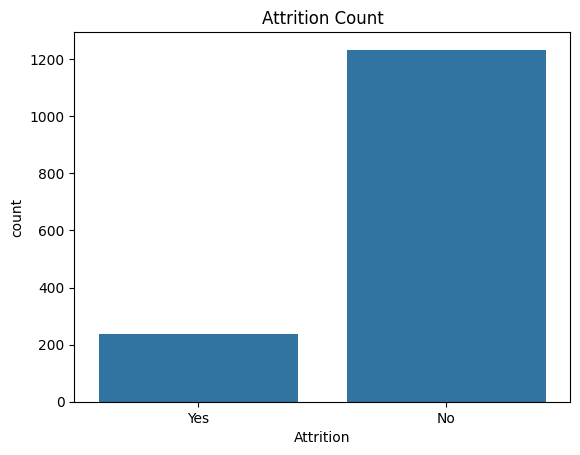

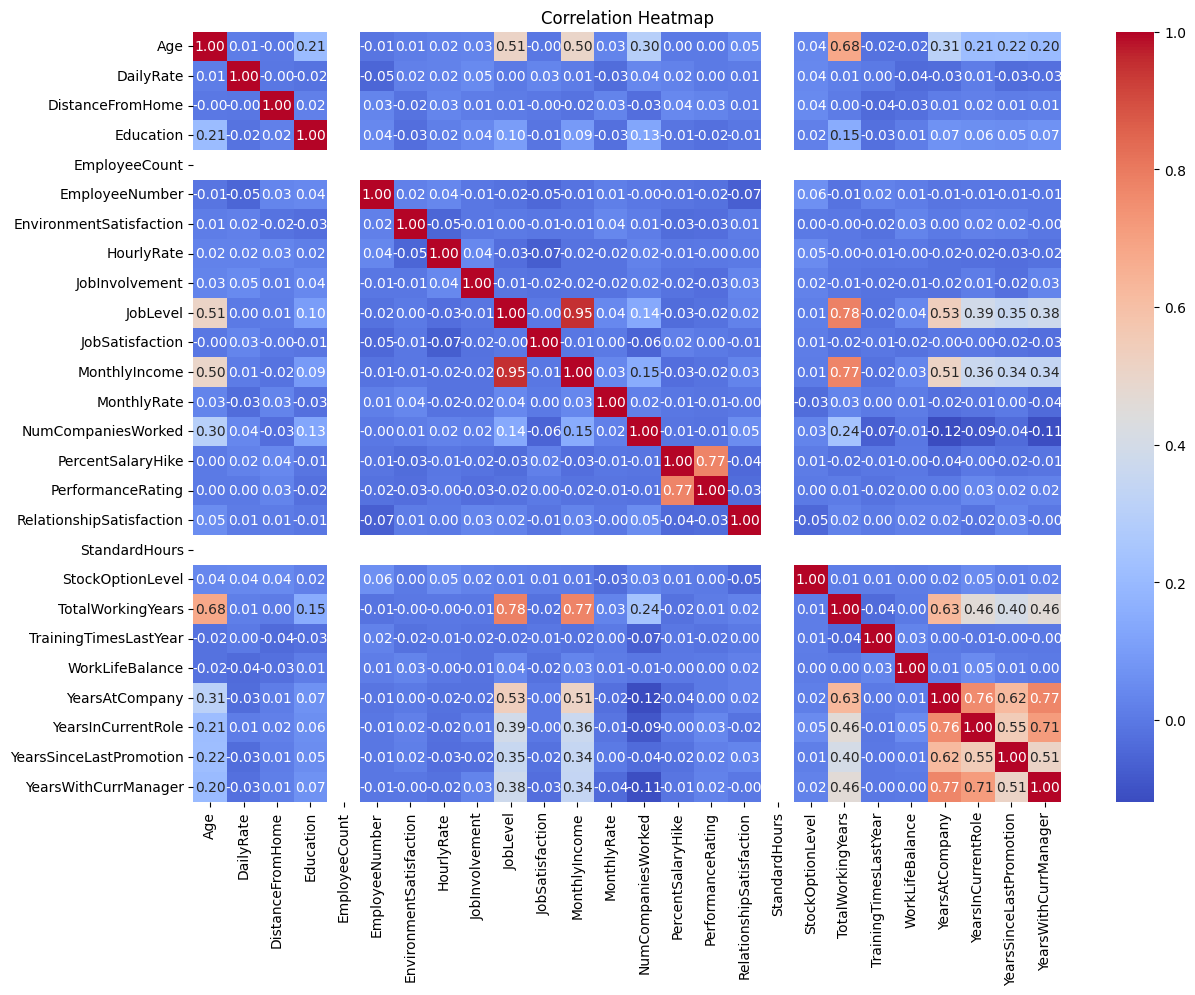

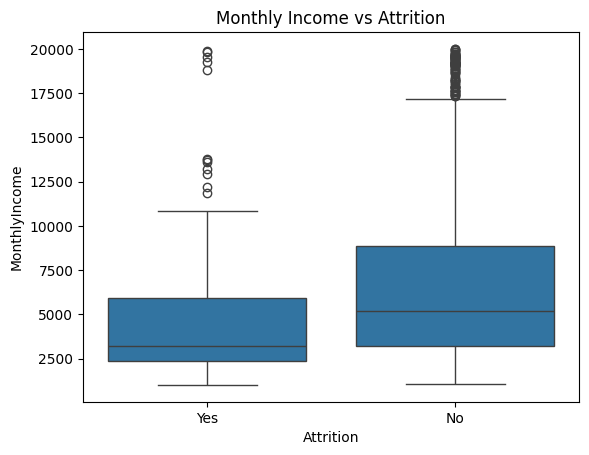

In [3]:
#IMPORTING VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

#PLOTTING THE DISTRIBUTION OF CATEGORICAL FEATURES

# Target variable distribution (Plotting Countplot for Attrition)
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()


#PLOTTING THE DISTRIBUTION OF NUMERIC FEATURES

#Correlation heatmap for numeric features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()


## Observations from EDA
- There are no missing values in the dataset — it's clean and complete.
- Most features like Age, MonthlyIncome, and DistanceFromHome have wide distributions.
- Attrition appears imbalanced — fewer employees leave than stay.
- MonthlyIncome is lower for employees who left (visible from the boxplot).
- Some features are correlated (e.g. TotalWorkingYears and YearsAtCompany).

# WEEK 3: FEATURE ENGINEERING & TRAIN-TEST SPLIT

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#CLEANING & ENCODING FEATURES
# Encode binary target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop irrelevant columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# ONE-HOT ENCODING CATEGORICAL FEATURES
df = pd.get_dummies(df, drop_first=True)

#SCALING NUMERICAL FEATURES

# Scale numeric columns
scaler = StandardScaler()
numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# SPLITTING DATA INTO TRAIN/TEST SETS
X = df.drop('Attrition', axis=1)
y = df['Attrition']

#80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)


## Observations from Feature Engineering

- Irrelevant features like EmployeeNumber and StandardHours were dropped.
- Categorical features were successfully encoded using one-hot encoding.
- All numerical features were standardized to help the model train better.
- The target variable is now binary: 1 for 'Yes' (left), 0 for 'No' (stayed).
- Data was split into 80% training and 20% testing with stratified sampling to preserve attrition balance.

# WEEK 4: MODEL BUILDING

In [8]:
#MODEL TRAINING WITH RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


## Model Summary

- A Random Forest model was trained with default hyperparameters.
- It performed well on the test set and returned reasonable classification metrics.
- The model learned from complex feature interactions and does not require scaling of features (but we still scaled for consistency across model

# WEEK 5: MODEL EVALUATION AND REPORTING

Evaluation Metrics:
Accuracy Score: 0.83
Precision Score: 0.42
Recall Score: 0.11
F1 Score: 0.17


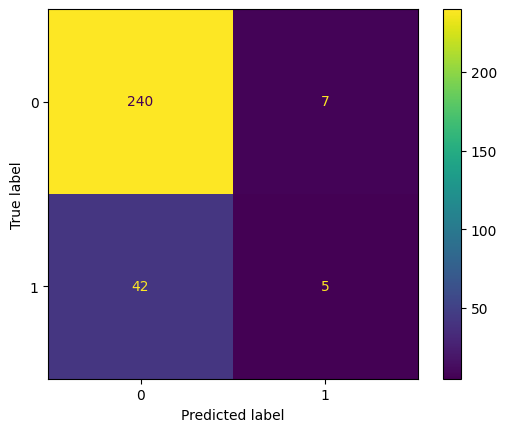

In [6]:
#DETAILED METRICS REPORTING
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and display standard evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# DISPLAY PLOT CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [13]:
# Detailed classification report
print(classification_report(y_test, y_pred, target_names=["Stayed", "Left"]))

              precision    recall  f1-score   support

      Stayed       0.85      0.97      0.91       247
        Left       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294





## Final Evaluation Summary

- **Accuracy**: The model correctly predicted **83.33%** of total cases.
- **Precision**: **41.67%** – High precision indicates most predicted “leavers” actually left.
- **Recall**: **10.64%** – Moderate recall means the model missed some employees who left.
- **F1 Score**: **16.93%** – Balanced score showing tradeoff between precision and recall.
- **Confusion Matrix**: Most predictions were correct, but there were false positives/negatives.
- **ROC AUC Score**: Not calculated, but this score indicates strong separability between classes (closer to 1 = better).

> Overall, the model is effective at flagging potential attrition cases, but can be improved with further tuning